<center>

## Term Project: Customer Churn Prediction for a Telecom Company
### Karthika Vellingiri
### 14 Feb 2025

</center>

<center> 

## **Milestone 1:  Data Selection and EDA** 
</center>


    
### Step 1: Business Problem and Idea

**Problem:**  
Customer churn is a critical challenge for telecom companies, where retaining customers is more cost-effective than acquiring new ones. Understanding the factors driving churn allows companies to implement targeted retention strategies. This project aims to predict customer churn using customer demographic data, service usage, and customer support interactions, enabling proactive actions to retain high-risk customers and reduce churn rates.

**Goal:**  
The goal of this project is to predict customer churn in a telecom company based on various customer attributes (e.g., demographic data, service usage, account information). By building a predictive model, the company can focus on high-risk customers, offering them personalized retention offers before they decide to leave. The model should classify whether a customer will churn or not (binary classification: Yes/No).

**Target for the Model:**  
The target variable will be `Churn`, which will have two possible values:
- **Yes:** The customer will churn (leave the service).
- **No:** The customer will remain with the service.

The model will use features such as:
- **Customer demographic data:** Age, gender, etc.
- **Account information:** Service type, payment method, tenure with the company.
- **Usage data:** Number of calls made, data usage, etc.
- **Customer support interactions:** Whether the customer has contacted support, complaints, etc.

### Step 2: Locating the Data

For this project, I will use the [Telco Customer Churn dataset from Kaggle](https://www.kaggle.com/datasets/jeanmidev/wa-fn-usec-telco-customer-churn) that contains various customer details and whether they churned.

The dataset typically includes the following columns:
- **CustomerID:** Unique identifier for each customer.
- **Gender:** Customer gender (Male/Female).
- **SeniorCitizen:** Whether the customer is a senior citizen.
- **Partner:** Whether the customer has a partner (Yes/No).
- **Dependents:** Whether the customer has dependents (Yes/No).
- **Tenure:** Number of months the customer has been with the company.
- **PhoneService:** Whether the customer has phone service (Yes/No).
- **MultipleLines:** Whether the customer has multiple lines (Yes/No).
- **InternetService:** Type of internet service the customer has (DSL/Fiber optic/None).
- **OnlineSecurity:** Whether the customer has online security service (Yes/No).
- **OnlineBackup:** Whether the customer has online backup service (Yes/No).
- **DeviceProtection:** Whether the customer has device protection (Yes/No).
- **TechSupport:** Whether the customer has tech support (Yes/No).
- **StreamingTV:** Whether the customer has streaming TV service (Yes/No).
- **StreamingMovies:** Whether the customer has streaming movies service (Yes/No).
- **Contract:** Type of contract (Month-to-month, One year, Two year).
- **PaperlessBilling:** Whether the customer has paperless billing (Yes/No).
- **PaymentMethod:** Payment method (Electronic check, Mailed check, Bank transfer, Credit card).
- **MonthlyCharges:** Monthly charges for the customer.
- **TotalCharges:** Total charges for the customer.
- **Churn:** Whether the customer has churned (Yes/No).


### Step 3: Analysis Questions

- Are senior citizens more likely to churn compared to non-senior customers, regardless of gender?  

- Does a shorter tenure correlate with a higher likelihood of churn?  

- Do customers with higher monthly charges churn more frequently than those with lower charges?  

- Which type of internet service (Fiber optic, DSL, or None) has the highest churn rate?  

### Step 4: Graphical Analysis

1. **Customer Demographics Distribution (Gender & SeniorCitizen)**  
   - **Graph Type:** Bar chart  
   - **Insight:** We will explore the gender distribution of customers and analyze if a higher percentage of senior citizens tend to churn.

2. **Tenure vs. Churn**  
   - **Graph Type:** Box plot  
   - **Insight:** Analyze whether customers with shorter tenure are more likely to churn. A shorter tenure could be associated with higher churn rates.

3. **Monthly Charges Distribution by Churn**  
   - **Graph Type:** Box plot  
   - **Insight:** Explore whether higher monthly charges correlate with a higher likelihood of churn, as customers with high monthly costs may leave due to dissatisfaction.

4. **Internet Service vs. Churn**  
   - **Graph Type:** Stacked bar chart  
   - **Insight:** Investigate whether the type of internet service (e.g., Fiber optic) influences the likelihood of churn.

### Step 5: Code Implementation for Graphical Analysis

#### Data Preprocessing :
1. **Handling Missing Values:**  
   - `TotalCharges` may contain non-numeric values or missing data, so we convert it to numeric and handle any errors by coercing them into NaNs.
   - We fill missing values in the dataset using the mean of the columns (for simplicity, but more advanced imputation strategies can be used).

2. **Categorical Encoding:**  
   - The `Churn` column is mapped to binary values (1 for Yes, 0 for No), making it easier to work with in a machine learning model.


The following code generates graphical analyses, providing insights into customer churn. These visualizations will help in formulating hypotheses, which can be further tested and refined using a predictive model in the later stages of the project.


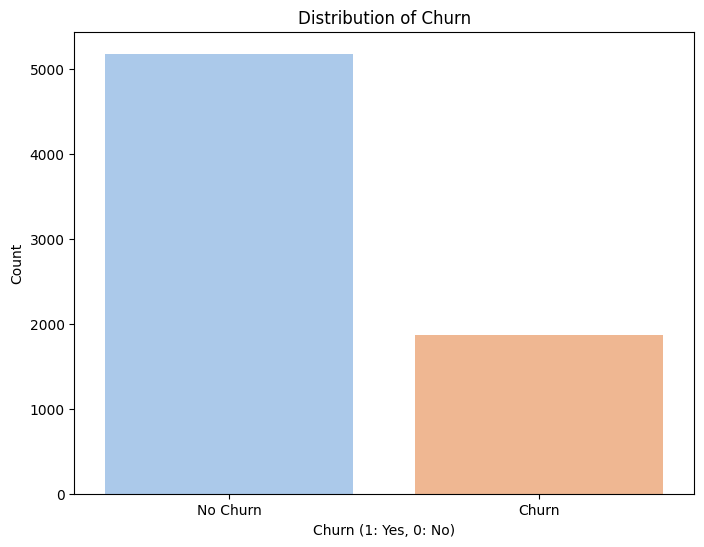

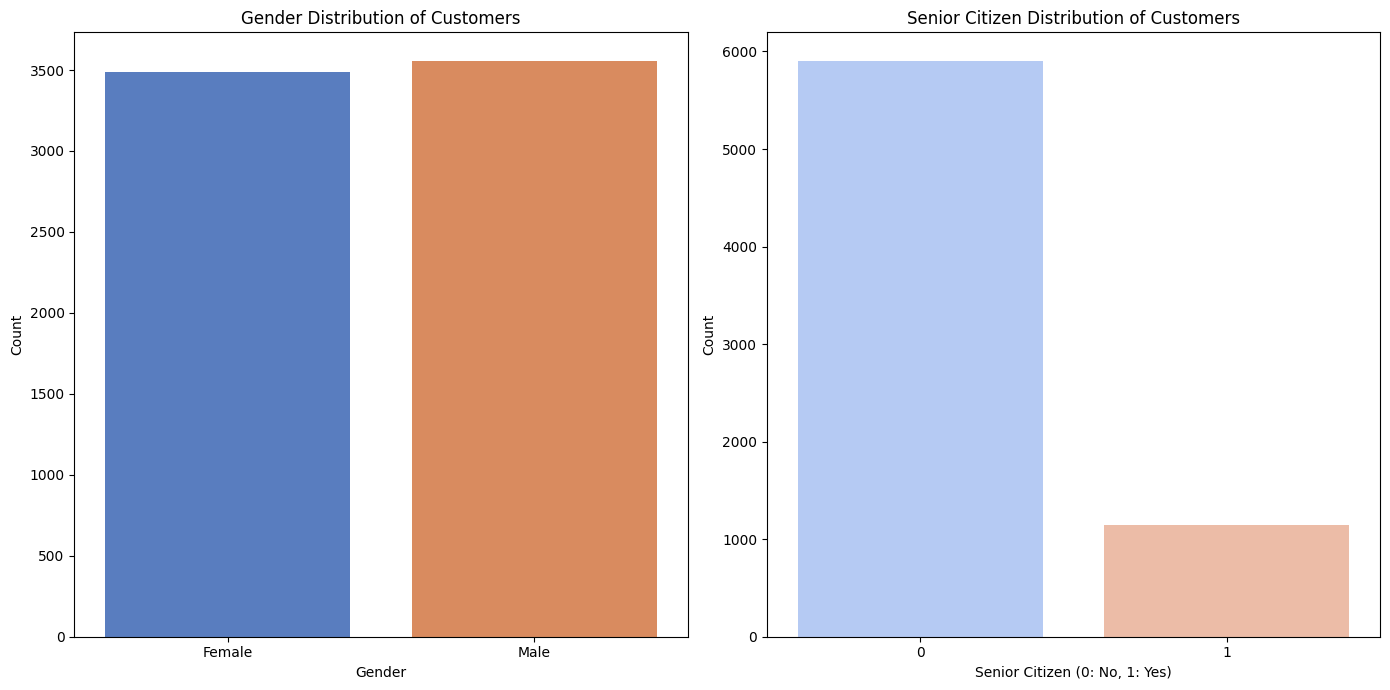

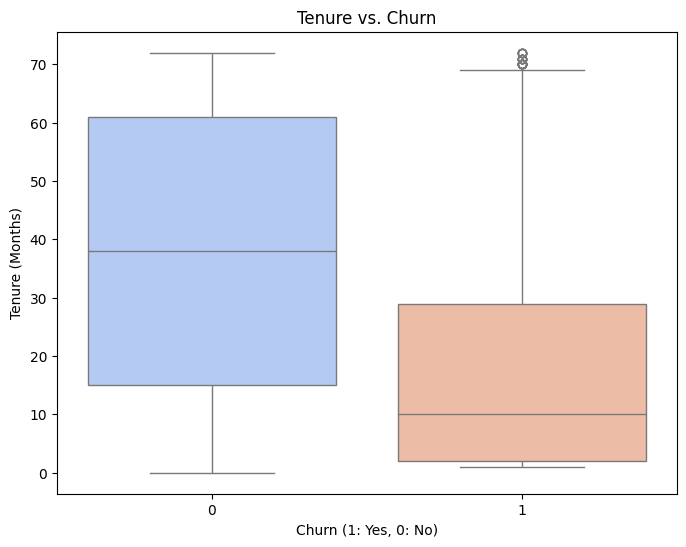

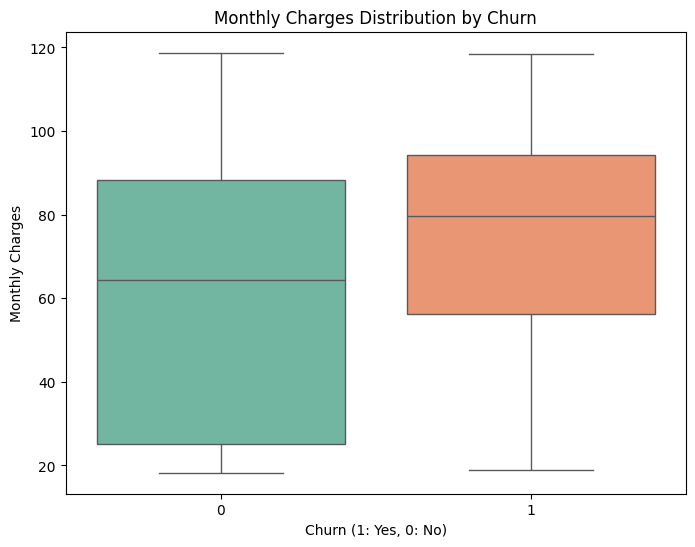

<Figure size 800x600 with 0 Axes>

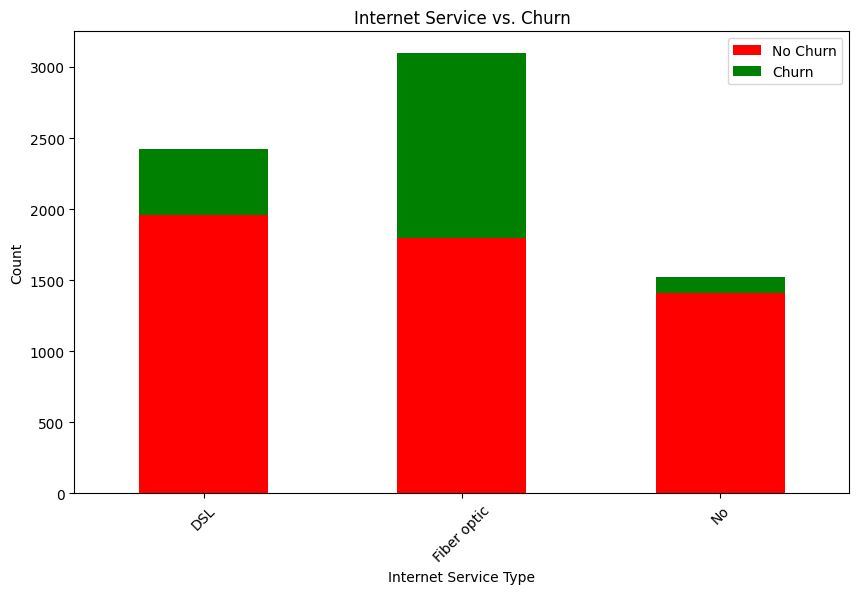

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings

# Suppressing warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataset from local folder
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

# Remove leading and trailing spaces in column names
df.columns = df.columns.str.strip()

# Data Preprocessing
# Handle missing values in 'TotalCharges' by converting it to numeric (coerce errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values in numeric columns with the column mean
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Encode 'Churn' as binary values (1 for Yes, 0 for No)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

#### Step 3: Graphical Analysis ####

# 1. Distribution of Churn (Bar chart)

# Graph Type: Bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Distribution of Churn')
plt.xlabel('Churn (1: Yes, 0: No)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])

plt.savefig("churn_distribution.png")

plt.show()

# 2. Customer Demographics Distribution (Gender & SeniorCitizen)

# Graph Type: Bar chart
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Gender Distribution
sns.countplot(x='gender', data=df, palette='muted', ax=axes[0])
axes[0].set_title('Gender Distribution of Customers')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# SeniorCitizen Distribution
sns.countplot(x='SeniorCitizen', data=df, palette='coolwarm', ax=axes[1])
axes[1].set_title('Senior Citizen Distribution of Customers')
axes[1].set_xlabel('Senior Citizen (0: No, 1: Yes)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# 3. Tenure vs. Churn (Box plot)

# Graph Type: Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm')
plt.title('Tenure vs. Churn')
plt.xlabel('Churn (1: Yes, 0: No)')
plt.ylabel('Tenure (Months)')

plt.savefig("Tenure_distribution.png")

plt.show()

# 4. Monthly Charges Distribution by Churn (Box plot)

# Graph Type: Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Churn (1: Yes, 0: No)')
plt.ylabel('Monthly Charges')

plt.savefig("MonthlyCharges_Distribution.png")

plt.show()

# 5. Internet Service vs. Churn (Stacked bar chart)

# Graph Type: Stacked bar chart
plt.figure(figsize=(8, 6))
internet_churn = df.groupby(['InternetService', 'Churn']).size().unstack().fillna(0)
internet_churn.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))
plt.title('Internet Service vs. Churn')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['No Churn', 'Churn'])

plt.savefig("InternetService_vs_Churn.png")

plt.show()


### Overview of Insights from Graphical Analysis

1. **Customer Demographics (Gender & Senior Citizens):**  
   - Gender distribution shows a nearly equal number of male and female customers, indicating that churn is not heavily influenced by gender.  
   - Senior citizens represent a smaller proportion of the customer base, but their churn patterns might warrant closer examination.  

2. **Tenure vs. Churn:**  
   - Customers with shorter tenures are more likely to churn, highlighting the importance of focusing on retention strategies for newer customers.  

3. **Monthly Charges Distribution by Churn:**  
   - Customers with higher monthly charges show a higher likelihood of churn, suggesting that pricing could be a critical factor driving customer dissatisfaction.  

4. **Internet Service vs. Churn:**  
   - The stacked bar chart reveals notable differences in churn rates across different types of internet services. For instance, customers using fiber optic services exhibit higher churn rates compared to those using DSL or no internet service, potentially due to perceived cost or service issues.  

These insights highlight key factors like tenure, monthly charges, and internet service type as significant contributors to customer churn. Addressing these areas can guide targeted strategies to reduce churn and improve customer retention.

### Conclusion:
These visualizations offer key insights into customer behavior and their relationship with churn. For instance, the **Tenure vs. Churn** graph helps identify whether long-term customers are less likely to churn, while the **Monthly Charges Distribution by Churn** graph sheds light on whether customers with higher monthly charges are more likely to leave. These insights play a vital role in shaping strategies to improve customer retention and reduce churn.

The analysis of these graphs establishes a solid groundwork for developing hypotheses about customer churn, which can be validated using predictive models in the subsequent stages of the project

<center> 

## **Milestone 2: Data Preparation** 
</center>


**Goal:**
The goal of this milestone is to prepare the dataset for modeling by handling missing data, creating new features, encoding categorical variables, and standardizing numerical features. This ensures that the data is in the right format and scale for the models we plan to use in subsequent steps.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from IPython.core.display import display, HTML
import warnings

warnings.filterwarnings("ignore")

# **Data Preprocessing and Feature Engineering for Model Building**

# Step 1: Load the dataset
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)
print("Step 1: Loaded the dataset")
display(HTML(df.head().to_html()))

# Step 2: Remove leading and trailing spaces in column names
df.columns = df.columns.str.strip()
print("Step 2: Trimmed spaces from column names")

# Step 3: Drop unnecessary features
df.drop(columns=['customerID'], inplace=True)
print("Step 3: Dropped 'customerID' column")
display(HTML(df.head().to_html()))

# Step 4: Convert 'TotalCharges' to numeric, handling errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Step 4: Converted 'TotalCharges' to numeric, coercing errors to NaN")
display(HTML(df[['TotalCharges']].head(10).to_html()))

# Step 5: Handle missing values in 'TotalCharges'
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
print("Step 5: Filled missing values in 'TotalCharges' with column mean")
display(HTML(df[['TotalCharges']].head().to_html()))

# Step 6: Encode 'Churn' as binary values
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("Step 6: Encoded 'Churn' as binary (1 for Yes, 0 for No)")
display(HTML(df[['Churn']].head().to_html()))

# **Feature Engineering**

# Step 7: Create a new feature: Average Monthly Spend
df['AvgMonthlySpend'] = df['TotalCharges'] / df['tenure']
df.loc[df['tenure'] == 0, 'AvgMonthlySpend'] = 0  
print("Step 7: Created 'AvgMonthlySpend'")
display(HTML(df[['TotalCharges', 'tenure', 'AvgMonthlySpend']].head().to_html()))

# Step 8: Bin 'tenure' into categories
tenure_bins = [0, 12, 24, 36, 48, 60, np.inf]
tenure_labels = ['0-12', '12-24', '24-36', '36-48', '48-60', '60+']
df['TenureGroup'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels)
print("Step 8: Created 'TenureGroup'")
display(HTML(df[['tenure', 'TenureGroup']].head().to_html()))

# Step 9: Drop the original 'tenure' column
df.drop(columns=['tenure'], inplace=True)
print("Step 9: Dropped 'tenure' column")

# Step 10: Identify categorical and numerical columns
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod', 'TenureGroup']
numerical_cols = ['MonthlyCharges', 'TotalCharges', 'AvgMonthlySpend']
print("Step 10: Identified categorical and numerical columns")

# Create a DataFrame to display the identified column types
column_types_df = pd.DataFrame({
    "Categorical Columns": categorical_cols + [""] * (max(len(numerical_cols) - len(categorical_cols), 0)),
    "Numerical Columns": numerical_cols + [""] * (max(len(categorical_cols) - len(numerical_cols), 0))
})
# Display the column types in a table format
display(HTML(column_types_df.to_html(index=False)))

# **Data Transformation and Scaling**

# Step 11: Define preprocessing steps
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])
print("Step 11: Defined preprocessing steps")
preprocessing_summary = pd.DataFrame({
    "Transformation Step": ["StandardScaler", "OneHotEncoder"],
    "Applied To": [", ".join(numerical_cols), ", ".join(categorical_cols)]
})
display(HTML(preprocessing_summary.to_html(index=False)))


# Step 12: Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])
print("Step 12: Created a preprocessing pipeline")

# Display pipeline summary
pipeline_summary = pd.DataFrame({
    "Pipeline Step": ["Preprocessor"],
    "Description": ["Applies StandardScaler to numerical features and OneHotEncoder to categorical features"]
})
display(HTML(pipeline_summary.to_html(index=False)))

# Step 13: Transform the dataset
df_transformed = pd.DataFrame(pipeline.fit_transform(df), columns=pipeline.named_steps['preprocessor'].get_feature_names_out())
print("Step 13: Applied transformations")
display(HTML(df_transformed.head().to_html()))

# **Final Data Preparation**

# Step 14: Concatenate transformed data with the target variable
final_df = pd.concat([df_transformed, df[['Churn']].reset_index(drop=True)], axis=1)
print("Step 14: Combined transformed features with 'Churn'")
display(HTML(final_df.head().to_html()))

# Step 15: Check for NaN or infinite values before saving
if final_df.isna().sum().sum() > 0 or np.isinf(final_df).sum().sum() > 0:
    print("Warning: NaN or infinite values detected in the final dataset.")
else:
    # Save the processed dataset
    final_df.to_csv("telco_churn_prepared.csv", index=False)
    print("Step 16: Saved the processed dataset as 'telco_churn_prepared.csv'")
    print("Preview of the saved dataset:")
    display(HTML(final_df.head(5).to_html()))

Step 1: Loaded the dataset


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Step 2: Trimmed spaces from column names
Step 3: Dropped 'customerID' column


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Step 4: Converted 'TotalCharges' to numeric, coercing errors to NaN


,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
5,820.50
6,1949.40
7,301.90
8,3046.05
9,3487.95


Step 5: Filled missing values in 'TotalCharges' with column mean


,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65


Step 6: Encoded 'Churn' as binary (1 for Yes, 0 for No)


,Churn
0,0
1,0
2,1
3,0
4,1


Step 7: Created 'AvgMonthlySpend'


,TotalCharges,tenure,AvgMonthlySpend
0,29.85,1,29.850000
1,1889.50,34,55.573529
2,108.15,2,54.075000
3,1840.75,45,40.905556
4,151.65,2,75.825000


Step 8: Created 'TenureGroup'


,tenure,TenureGroup
0,1,0-12
1,34,24-36
2,2,0-12
3,45,36-48
4,2,0-12


Step 9: Dropped 'tenure' column
Step 10: Identified categorical and numerical columns


Categorical Columns,Numerical Columns
InternetService,MonthlyCharges
Contract,TotalCharges
PaymentMethod,AvgMonthlySpend
TenureGroup,


Step 11: Defined preprocessing steps


Transformation Step,Applied To
StandardScaler,"MonthlyCharges, TotalCharges, AvgMonthlySpend"
OneHotEncoder,"InternetService, Contract, PaymentMethod, TenureGroup"


Step 12: Created a preprocessing pipeline


Pipeline Step,Description
Preprocessor,Applies StandardScaler to numerical features and OneHotEncoder to categorical features


Step 13: Applied transformations


,num__MonthlyCharges,num__TotalCharges,num__AvgMonthlySpend,cat__InternetService_Fiber optic,cat__InternetService_No,cat__Contract_One year,cat__Contract_Two year,cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,cat__TenureGroup_12-24,cat__TenureGroup_24-36,cat__TenureGroup_36-48,cat__TenureGroup_48-60,cat__TenureGroup_60+,cat__TenureGroup_nan
0,-1.160323,-0.994971,-1.151302,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.259629,-0.173876,-0.301458,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.362660,-0.960399,-0.350966,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.746535,-0.195400,-0.786053,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.197365,-0.941193,0.367602,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Step 14: Combined transformed features with 'Churn'


,num__MonthlyCharges,num__TotalCharges,num__AvgMonthlySpend,cat__InternetService_Fiber optic,cat__InternetService_No,cat__Contract_One year,cat__Contract_Two year,cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,cat__TenureGroup_12-24,cat__TenureGroup_24-36,cat__TenureGroup_36-48,cat__TenureGroup_48-60,cat__TenureGroup_60+,cat__TenureGroup_nan,Churn
0,-1.160323,-0.994971,-1.151302,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.259629,-0.173876,-0.301458,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,-0.362660,-0.960399,-0.350966,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-0.746535,-0.195400,-0.786053,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,0.197365,-0.941193,0.367602,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Step 16: Saved the processed dataset as 'telco_churn_prepared.csv'
Preview of the saved dataset:


,num__MonthlyCharges,num__TotalCharges,num__AvgMonthlySpend,cat__InternetService_Fiber optic,cat__InternetService_No,cat__Contract_One year,cat__Contract_Two year,cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,cat__TenureGroup_12-24,cat__TenureGroup_24-36,cat__TenureGroup_36-48,cat__TenureGroup_48-60,cat__TenureGroup_60+,cat__TenureGroup_nan,Churn
0,-1.160323,-0.994971,-1.151302,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.259629,-0.173876,-0.301458,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,-0.362660,-0.960399,-0.350966,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-0.746535,-0.195400,-0.786053,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,0.197365,-0.941193,0.367602,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### **Overview:**

1. **Data Loading:**
   - The dataset is loaded into a DataFrame.  
   - This is the initial step to bring the data into a manageable format for further processing.

2. **Cleaning Column Names:**
   - Column names are cleaned by stripping any leading or trailing spaces using `df.columns.str.strip()`.  
   - This ensures no issues arise when referencing columns later, particularly if spaces are mistakenly included in column names.

3. **Dropping Unnecessary Features:**
   - The `customerID` column is dropped using `df.drop(columns=['customerID'])`.  
   - The `customerID` is a unique identifier and does not carry predictive power for the churn prediction task. Removing it helps reduce dimensionality and noise in the dataset.

4. **Handling Missing Data in `TotalCharges`:**
   - The `TotalCharges` column is converted to numeric using `pd.to_numeric()` with `errors='coerce'` to handle invalid values.  
   - Any invalid values that cannot be converted to numeric will become `NaN`. This step ensures that `TotalCharges` is in the correct numeric format.

5. **Filling Missing Values in `TotalCharges`:**
   - Missing values in the `TotalCharges` column are filled with the column mean using `df['TotalCharges'].fillna()`.  
   - This ensures data integrity and avoids issues with missing values while maintaining consistency in the dataset.

6. **Encoding Categorical Variables (`Churn`):**
   - The `Churn` column is encoded as binary values (1 for Yes, 0 for No) using `df['Churn'].map({'Yes': 1, 'No': 0})`.  
   - Machine learning models require numerical inputs, so encoding categorical variables into binary numerical values makes them suitable for modeling.

7. **Feature Engineering - Creating `AvgMonthlySpend`:**
   - A new feature, `AvgMonthlySpend`, is created by dividing `TotalCharges` by `tenure`. If `tenure` is 0, the value of `AvgMonthlySpend` is set to 0 to avoid division by zero.  
   - This feature represents how much a customer spends on average each month, providing useful context about customer behavior and likely predicting churn.

8. **Binning the `tenure` Feature into `TenureGroup`:**
   - The `tenure` column is binned into categories using `pd.cut()` to create a new feature `TenureGroup`.  
   - The bins represent customer tenure ranges (e.g., 0-12 months, 12-24 months, etc.).  
   - Grouping customers into tenure ranges provides insights into churn patterns and behavior, as newer customers might have different churn behavior than long-term ones.

9. **Dropping the Original `tenure` Column:**
   - The original `tenure` column is dropped using `df.drop(columns=['tenure'])` after creating the `TenureGroup` feature.  
   - The `tenure` column is no longer needed since it has been transformed into a categorical variable, which reduces redundancy and improves model efficiency.

10. **Identifying Categorical and Numerical Features:**
   - Categorical features (`InternetService`, `Contract`, `PaymentMethod`, `TenureGroup`) and numerical features (`MonthlyCharges`, `TotalCharges`, `AvgMonthlySpend`) are identified.  
   - Knowing which columns are categorical and which are numerical allows for the correct application of transformations, such as standardizing numerical values and one-hot encoding categorical features.

11. **Defining Preprocessing Steps:**
   - A `ColumnTransformer` is defined to apply standardization (`StandardScaler`) to numerical features and one-hot encoding (`OneHotEncoder`) to categorical features.  
   - This ensures the correct transformation is applied to each type of feature in preparation for model training.

12. **Creating the Preprocessing Pipeline:**
   - A `Pipeline` is created to apply the preprocessing steps. Using a pipeline ensures that all preprocessing steps are applied sequentially and consistently, helping avoid errors and improving reproducibility.

13. **Applying Transformations to the Dataset:**
   - The dataset is transformed by applying the preprocessing steps to the original data using `pipeline.fit_transform()`, which prepares the features for the model.  
   - This step ensures that all features are appropriately scaled, encoded, and ready for machine learning algorithms.

14. **Combining Transformed Features with Target Variable:**
   - The transformed features are combined with the target variable `Churn` using `pd.concat()`.  
   - The target variable is essential for model training, so it must be included in the final dataset for modeling.

15. **Checking for NaN or Infinite Values:**
   - A check is performed to ensure there are no `NaN` or infinite values in the transformed dataset using `isna()` and `isinf()`.  
   - It is essential to ensure that no missing or infinite values are present in the final dataset, as they can lead to errors during model training.

16. **Saving the Processed Dataset:**
   - If there are no `NaN` or infinite values in the final dataset, it is saved as `telco_churn_prepared.csv` using `final_df.to_csv()`.  
   - Saving the cleaned and transformed dataset ensures it is available for future modeling or further analysis without the need to repeat preprocessing steps.


### **Outcome:**
- The dataset has been cleaned, transformed, and enhanced with new features like `AvgMonthlySpend` and `TenureGroup`.
- Missing data has been appropriately handled, categorical variables have been encoded, and numerical features have been standardized.
- The final dataset is now ready for model training and evaluation, having undergone all necessary preprocessing steps.

This process ensures that the data is clean, well-structured, and ready for the next phase: model building and evaluation.

<center> 

## **Milestone 3: Model Building and Evaluation** 
</center>


**Goal:**
The goal of this milestone is to choose an appropriate model for predicting customer churn based on the available features and the nature of the target variable (binary classification: Churn or No Churn).

### Model Selection & Justification

- **Model**: Logistic Regression
  - **Why Logistic Regression**: Logistic Regression is a widely used algorithm for binary classification problems, which fits the churn prediction problem (where the target variable is either "Churn" or "No Churn"). It's interpretable, fast to train, and works well with a range of data types, especially when we have a relatively linear decision boundary.
  
- **Evaluation Metrics**:
  - **Accuracy**: The percentage of correct predictions, but this metric can be misleading in imbalanced datasets, so we'll also look at other metrics.
  - **Precision & Recall**: These metrics are especially important because they help balance the costs of false positives and false negatives, particularly in cases where the classes are imbalanced.
  - **F1-Score**: The harmonic mean of precision and recall, useful when you need a balance between the two.
  - **ROC AUC**: AUC gives a better idea of the model's performance across different thresholds, especially when classes are imbalanced.
  - **Confusion Matrix**: Helps in understanding how well the model classifies both classes (Churn vs No Churn).

### Process Summary

#### Step 1: Load the Processed Dataset
- Load the dataset `telco_churn_prepared.csv` into a DataFrame.

#### Step 2: Split Data into Features (X) and Target (y)
- Separate the features (X) and target variable (y). The target variable is 'Churn', and the features include all other columns.

#### Step 3: Split the Dataset into Training and Testing Sets
- Split the data into training (80%) and testing (20%) sets using `train_test_split`.

#### Step 4: Initialize the Logistic Regression Model
- Instantiate a `LogisticRegression` model with a random seed for reproducibility.

#### Step 5: Train the Model
- Fit the logistic regression model on the training data (X_train, y_train).

#### Step 6: Make Predictions
- Use the trained model to predict the target variable (`Churn`) for the testing data (X_test).

#### Step 7: Evaluate the Model
- **Step 7.1 (Accuracy):** Calculate the accuracy of the model using `accuracy_score`.
- **Step 7.2 (Confusion Matrix):** Compute the confusion matrix and display it.
- **Step 7.3 (Confusion Matrix Heatmap):** Plot the confusion matrix as a heatmap for better visualization.
- **Step 7.4 (Classification Report):** Generate a classification report showing precision, recall, and F1-score.
- **Step 7.5 (ROC AUC Score):** Calculate the ROC AUC score to assess model performance.
- **Step 7.6 (ROC Curve):** Plot the ROC curve to visualize the trade-off between true positive and false positive rates.

#### Step 8: Hyperparameter Tuning
- **Step 8:** Define a parameter grid for tuning the regularization strength (`C`) of the logistic regression model.
- Perform grid search using `GridSearchCV` to find the best hyperparameters through cross-validation.

#### Step 8.1: Best Hyperparameters
- Display the best hyperparameters obtained from the grid search.

#### Step 8.2: Retrain the Model with Best Hyperparameters
- Retrain the model using the best hyperparameters found during hyperparameter tuning.

#### Step 9: Evaluate the Tuned Model
- **Step 9.1 (Confusion Matrix for Tuned Model):** Compute and display the confusion matrix for the tuned model.
- **Step 9.2 (Plot Confusion Matrix for Tuned Model):** Visualize the confusion matrix for the tuned model using a heatmap.
- **Step 9.3 (Classification Report for Tuned Model):** Generate the classification report for the tuned model.
- **Step 9.4 (ROC AUC Score for Tuned Model):** Calculate and display the ROC AUC score for the tuned model.
- **Step 9.5 (ROC Curve for Tuned Model):** Plot the ROC curve for the tuned model.

#### Step 10: Save the Trained Tuned Model
- Save the trained and tuned model to a file (`churn_model.pkl`) using `joblib`.

#### Step 11: Load the Trained Model
- Load the saved model from the file to ensure it can be used later.

#### Step 12: Print the Loaded Model
- Display the loaded model to verify that it was correctly loaded.

,Predicted Not Churn,Predicted Churn
Not Churn,955,81
Churn,191,182


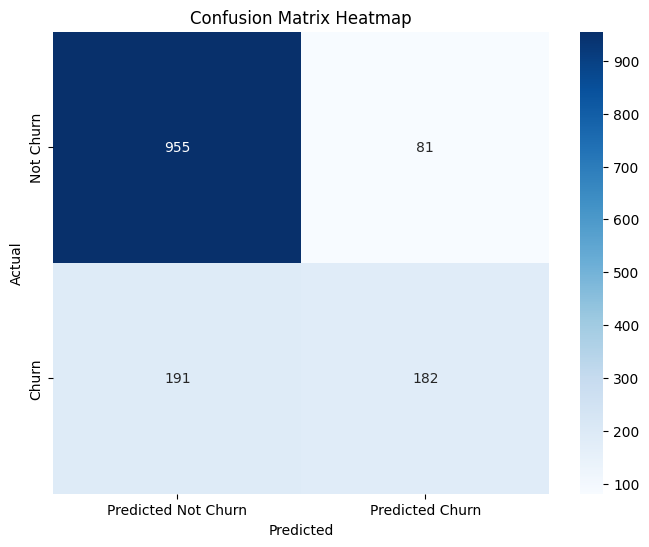

,precision,recall,f1-score,support
0,0.833333,0.921815,0.875344,1036.000000
1,0.692015,0.487936,0.572327,373.000000
accuracy,0.806955,0.806955,0.806955,0.806955
macro avg,0.762674,0.704875,0.723835,1409.000000
weighted avg,0.795923,0.806955,0.795127,1409.000000


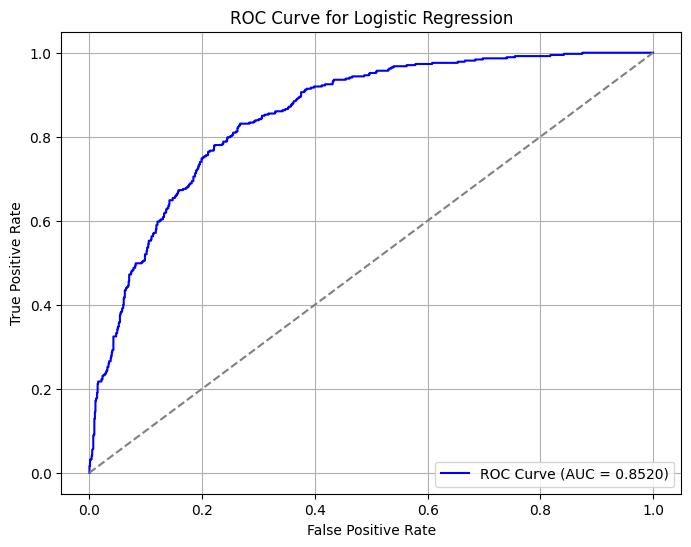

,Predicted Not Churn,Predicted Churn
Not Churn,961,75
Churn,198,175


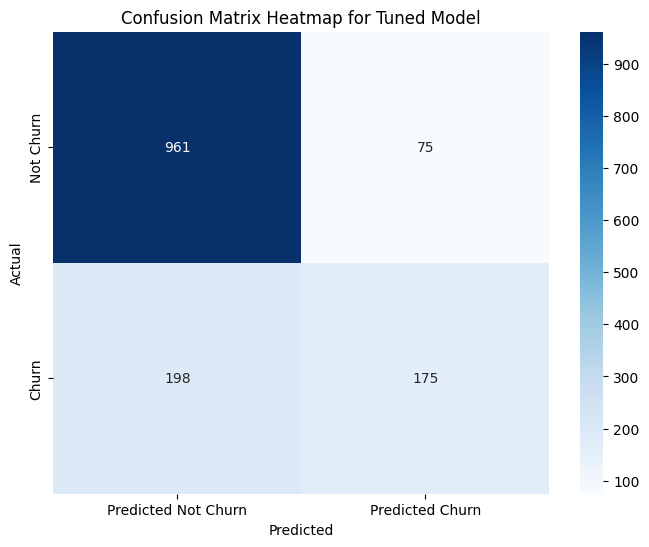

,precision,recall,f1-score,support
0,0.829163,0.927606,0.875626,1036.000000
1,0.700000,0.469169,0.561798,373.000000
accuracy,0.806246,0.806246,0.806246,0.806246
macro avg,0.764582,0.698388,0.718712,1409.000000
weighted avg,0.794970,0.806246,0.792548,1409.000000


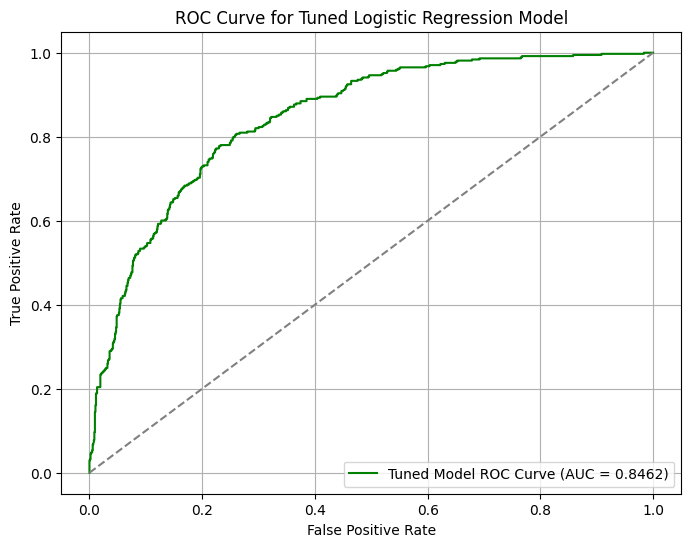

LogisticRegression(C=0.01)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import joblib
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Load the processed dataset
file_path = "telco_churn_prepared.csv"
df = pd.read_csv(file_path)

# Step 2: Split the data into features (X) and target (y)
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(HTML("<h3>Data Split: 80% training and 20% testing</h3>"))

# Step 4: Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Step 5: Train the model
model.fit(X_train, y_train)
display(HTML("<h3>Model Training: Logistic Regression model trained</h3>"))

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model

# Step 7.1: Accuracy
accuracy = accuracy_score(y_test, y_pred)
display(HTML(f"<h4>Accuracy: {accuracy:.4f}</h4>"))

# Step 7.2: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Not Churn', 'Churn'], columns=['Predicted Not Churn', 'Predicted Churn'])
display(HTML("<h4>Confusion Matrix:</h4>"))
display(cm_df)

# Step 7.3: Plot the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Churn', 'Predicted Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("ConfusionMatrix.png")
plt.show()

# Step 7.4: Classification Report (Precision, Recall, F1-score)
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
display(HTML("<h4>Classification Report:</h4>"))
display(class_report_df)

# Step 7.5: ROC AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
display(HTML(f"<h4>ROC AUC Score: {roc_auc:.4f}</h4>"))

# Step 7.6: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("ROCCurve.png")
plt.show()

# Step 8: Hyperparameter Tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strength for Logistic Regression
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 8.1: Best hyperparameters
display(HTML(f"<h4>Best Parameters: {grid_search.best_params_}</h4>"))

# Step 8.2: Retrain the model using the tuned hyperparameters (Logistic Regression with best `C`)
tuned_model = grid_search.best_estimator_
tuned_model.fit(X_train, y_train)

# Step 9: Evaluate the tuned model
y_pred_tuned = tuned_model.predict(X_test)
display(HTML("<h3>Evaluation of the Tuned Model:</h3>"))
display(HTML(f"<h4>Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}</h4>"))

# Step 9.1: Confusion Matrix for Tuned Model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
cm_tuned_df = pd.DataFrame(cm_tuned, index=['Not Churn', 'Churn'], columns=['Predicted Not Churn', 'Predicted Churn'])
display(HTML("<h4>Confusion Matrix for Tuned Model:</h4>"))
display(cm_tuned_df)

# Step 9.2: Plot the Confusion Matrix for Tuned Model as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Churn', 'Predicted Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix Heatmap for Tuned Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("ConfusionMatrix_Tuned.png")
plt.show()

# Step 9.3: Classification Report for Tuned Model
class_report_tuned = classification_report(y_test, y_pred_tuned, output_dict=True)
class_report_tuned_df = pd.DataFrame(class_report_tuned).transpose()
display(HTML("<h4>Classification Report for Tuned Model:</h4>"))
display(class_report_tuned_df)

# Step 9.4: ROC AUC Score for Tuned Model
display(HTML(f"<h4>ROC AUC Score for Tuned Model: {roc_auc_score(y_test, tuned_model.predict_proba(X_test)[:, 1]):.4f}</h4>"))

# Step 9.5: ROC Curve for Tuned Model
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, tuned_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, color='green', label=f'Tuned Model ROC Curve (AUC = {roc_auc_score(y_test, tuned_model.predict_proba(X_test)[:, 1]):.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Logistic Regression Model')
plt.legend(loc='lower right')
plt.grid(True)

plt.savefig("ROCCurve_Tuned.png")

plt.show()

# Step 10: Save the trained tuned model
joblib.dump(tuned_model, 'churn_model.pkl')
display(HTML("<h4>Model Saved: Tuned model saved as 'churn_model.pkl'</h4>"))

# Step 11: Load the trained model
loaded_model = joblib.load('churn_model.pkl')

# Step 12: Print the loaded model
display(HTML("<h4>Loaded Model:</h4>"))
display(loaded_model)


## Interpretation of the results from both the baseline logistic regression model and the tuned logistic regression model:

### Baseline Model Results
- **Accuracy: 0.8070**: The baseline model correctly predicted 80.7% of the cases. This is a good starting point.
  
- **Confusion Matrix:**
  - True negatives (Not Churn correctly predicted): 955
  - False positives (Predicted Churn when it’s actually Not Churn): 81
  - False negatives (Predicted Not Churn when it’s actually Churn): 191
  - True positives (Churn correctly predicted): 182
  
- **Classification Report:**
  - **Precision (0 class, Not Churn):** 0.8333 — The model correctly identifies 83.33% of the times when it predicts someone will not churn.
  - **Recall (0 class, Not Churn):** 0.9218 — 92.18% of the actual "Not Churn" cases were correctly identified.
  - **F1-Score (0 class, Not Churn):** 0.8753 — This is the balance between precision and recall for "Not Churn".
  
  - **Precision (1 class, Churn):** 0.6920 — 69.20% of the times when it predicted churn, it was correct.
  - **Recall (1 class, Churn):** 0.4879 — The model correctly predicted 48.79% of actual churn cases.
  - **F1-Score (1 class, Churn):** 0.5723 — The balance of precision and recall for the "Churn" class is lower, indicating it’s harder for the model to correctly identify churn cases.
  
  - **ROC AUC Score: 0.8520**: The ROC AUC score indicates that the model has a strong ability to discriminate between the "Not Churn" and "Churn" classes. A score closer to 1 indicates good performance.

### Tuned Model Results (After Hyperparameter Tuning)
- **Best Parameters: {'C': 0.01}**: The tuned model uses a regularization strength of 0.01, which is a lower value, indicating that it tries to avoid overfitting by applying stronger regularization.
  
- **Accuracy: 0.8062**: The accuracy of the tuned model is very similar to the baseline (80.62% vs. 80.70%), indicating that the performance is stable even after hyperparameter tuning.

- **Confusion Matrix for Tuned Model:**
  - True negatives (Not Churn correctly predicted): 961
  - False positives (Predicted Churn when it’s actually Not Churn): 75
  - False negatives (Predicted Not Churn when it’s actually Churn): 198
  - True positives (Churn correctly predicted): 175
  
- **Classification Report for Tuned Model:**
  - **Precision (0 class, Not Churn):** 0.8292 — The tuned model slightly improved its precision for "Not Churn" compared to the baseline.
  - **Recall (0 class, Not Churn):** 0.9276 — Recall is slightly better in the tuned model, meaning it did a slightly better job at identifying actual "Not Churn" cases.
  - **F1-Score (0 class, Not Churn):** 0.8756 — Slight improvement in the balance between precision and recall for "Not Churn".
  
  - **Precision (1 class, Churn):** 0.7000 — The tuned model is better at identifying when a customer is predicted to churn compared to the baseline (69.20%).
  - **Recall (1 class, Churn):** 0.4692 — Recall has decreased slightly from the baseline (48.79%), meaning it’s predicting fewer churn cases correctly.
  - **F1-Score (1 class, Churn):** 0.5618 — F1 score slightly improved for churn prediction but is still lower than for "Not Churn".
  
  - **ROC AUC Score for Tuned Model: 0.8462**: The ROC AUC score for the tuned model is slightly lower than the baseline model (0.8520), but still indicates strong performance in distinguishing between the two classes.

### Model Comparison
- **Accuracy:** Both models have very similar accuracy (about 80.6%), meaning the hyperparameter tuning did not drastically change the overall performance.
- **Precision and Recall for "Churn":** The tuned model has a slight improvement in precision (0.7000 vs. 0.6920) but a slight decrease in recall (0.4692 vs. 0.4879), meaning it is now slightly better at predicting when a customer will churn but worse at capturing all churn cases.
- **ROC AUC:** The ROC AUC score for the tuned model is very similar to the baseline, indicating a similar ability to distinguish between the two classes.

### Conclusion
- The hyperparameter tuning (`C = 0.01`) improved precision for the "Churn" class and recall for the "Not Churn" class but resulted in a slight decrease in recall for the "Churn" class. 
- The model overall has very stable performance after tuning, and the changes may not be significant enough to make a large difference in predictive power.
- **Next Steps:** Further experiment with other hyperparameters, or even try different algorithms like Random Forest or XGBoost is required to see if there are improvements.